# **1.Carga de importaciones y Data set**

In [ ]:
#---- Importaciones necesarias ----

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

#---- Metricas de modelos de clasificación ----

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#----  Curva ROC y PR ----

from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve

#---- Importación para el modelo LogisticRegression ----

from sklearn.linear_model import LogisticRegression

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.Preparacion de los datos**

## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

Eliminacion de columas
- **Unnamed 0:** no tendra un uso dentro de nuestro analisis y para las siguiente etapas.
- **AbnormalMatch:** esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas.
- **FirstKillTime:** FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas.
- **TimeAlive y TravelledDistance**: Estas variables no podran ser usadas debido al formato que presenta para el modelo.


In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)


In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**

trataremos de trasformar y arreglar variables que no son numericos, cambiar formatos  para poder utilizar despues  para preparar el modelado utilizando scaler

* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding
El label encoding nos ayudara a transformar los
datos categóricos **Team** y **Map** en un formato numérico como beneficio a posibles modelos de machine learning.

In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-11-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


- Se realiza una transformacion en los datos que contenga valores de tipo **TRUE** o **FALSE** a valores **numericos** con el proposito de realizar modelos que requieran de estos tipos de datos. Ademas, con esto, ayudara o benecifiar el procesamiento de los datos optimizando la velocidad y eficientiza.

In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

# **3. Modelo logistic Regresion**

Lo que se desea inicialmente en un problema de clasificación binaria, es identificar la probabilidad (p) de que un evento ocurra.

El comportamiento de este conjunto de puntos debe tender a ser un comportamiento en forma de “s” para que sea aplicado a la función logística y de esta forma entrenar un modelo de clasificación binaria.



### Ingreso de las caracteristicas

In [ ]:
X = df_backup[['MatchKills','MatchAssists','MatchHeadshots','RoundStartingEquipmentValue','RNonLethalGrenadesThrown','Team','Map']]
y = df_backup[['RoundWinner']]

### Separación de los datos: entrenamiento y prueba

In [ ]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Creacion del Modelo de Regresión Logística

In [ ]:
model = LogisticRegression(class_weight='balanced',   max_iter=1000, solver='lbfgs', )
model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(class_weight='balanced', max_iter=1000)

### Realizando predicciones

In [ ]:
# Predicciones
y_pred = model.predict(X_test_scaled)
y_scores = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de clase positiva

Una salida esperada puede reflejar resultados realistas del modelo, como una distribución equilibrada entre partidas ganadas y perdidas.


In [ ]:
predictions = model.predict(X)
print(predictions[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Utilizando **model.score()** que nos devuelve la precisión **media** de las predicciones. Entre mas cercano a 1 mejor.

In [ ]:
model.score(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.2931433659839715

### Evaluación del modelo

Precision: Cuanto menor es la dispersión mayor la precisión

Acurracy: En forma práctica la Exactitud es  la cantidad de predicciones positivas que fueron correctas.

In [ ]:
print(f"--- Métricas de Clasificación del modelo Logistic Regression ---\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred))

# MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)


--- Métricas de Clasificación del modelo Logistic Regression ---

              precision    recall  f1-score   support

           0       0.38      0.62      0.47      4612
           1       0.79      0.58      0.67     11110

    accuracy                           0.59     15722
   macro avg       0.58      0.60      0.57     15722
weighted avg       0.67      0.59      0.61     15722

Accuracy: 0.5943264215748633
Error Rate: 0.40567357842513674



Matriz de Confusión:
 [[2855 1757]
 [4621 6489]]


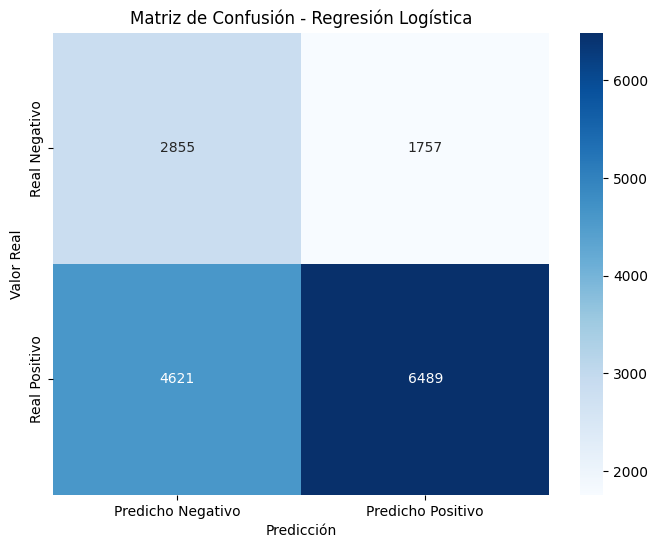

In [ ]:
# prompt: crea un grafico de matris de confuccion de losgistic regresion

import matplotlib.pyplot as plt
# MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho Negativo', 'Predicho Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### Calculando Sensitivity Y Specificity


- **Sensitivity:** Jugador que ganó la partida y el modelo lo clasificó como ganada. VP (Verdadero Positivo)

- **Specificity:** Jugador que perdió la partida y el modelo lo clasificó como perdida. VN (Verdadero Negativo)

Sensitivity: El modelo identifica un 51% de los jugadores que ganaron la partidas. Por lo que el modelo no es muy bueno reconociendo las partidas ganadas con un 50%


Specificity: El modelo identifica un 68% de jugadores que perdieron la partida. Por lo que el modelo reconoce de mejor manera las partidas perdidas.

In [ ]:
tn, fp, fn, tp = cm.ravel()

# Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")


Sensitivity: 0.5841
Specificity: 0.6190


### Graficos

###  Grafico de la función Sigmoide

La función logística, en la que se basa, es llamada función Sigmoide

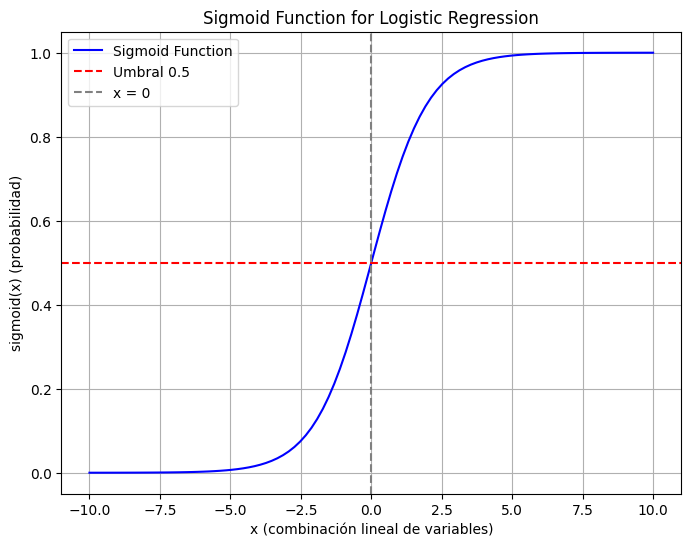

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values) # Esto representa Z

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='Umbral 0.5')
plt.axvline(0, color='gray', linestyle='--', label='x = 0')
plt.title('Sigmoid Function for Logistic Regression')
plt.xlabel('x (combinación lineal de variables)')
plt.ylabel('sigmoid(x) (probabilidad)')
plt.grid(True)
plt.legend()
plt.show()

### Predicción con un gráfico de dispersión

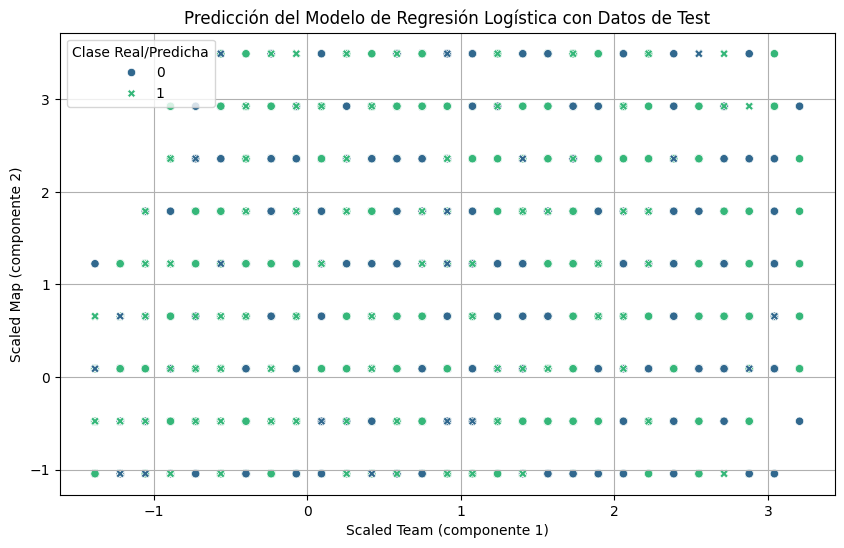

In [ ]:
# Visualizar los resultados de la predicción con un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=y_test.values.ravel(), style=y_pred, palette='viridis')
plt.title('Predicción del Modelo de Regresión Logística con Datos de Test')
plt.xlabel('Scaled Team (componente 1)')
plt.ylabel('Scaled Map (componente 2)')
plt.legend(title='Clase Real/Predicha')
plt.grid(True)
plt.show()

### Curva ROC

ROC AUC Score: 0.649


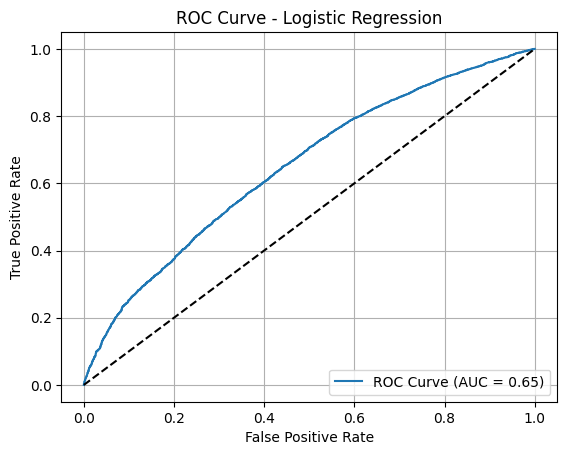

In [ ]:
# ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC Score: {roc_auc:.3f}")

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Curva PR

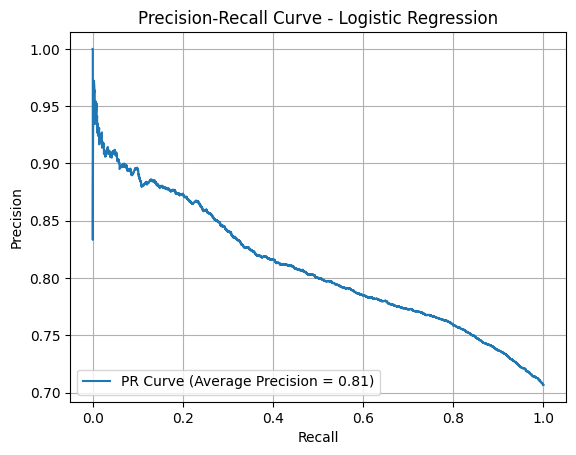

In [ ]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure()
plt.plot(recall, precision, label=f"PR Curve (Average Precision = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


# **GridsearchCV**

Mejores parámetros encontrados por GridSearchCV:
{'C': 1, 'max_iter': 1000, 'solver': 'liblinear'}
Mejor score (accuracy) en el conjunto de validación:
0.5931973971169209

Métricas de clasificación del mejor modelo en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.38      0.62      0.47      4612
           1       0.79      0.58      0.67     11110

    accuracy                           0.59     15722
   macro avg       0.58      0.60      0.57     15722
weighted avg       0.67      0.59      0.61     15722

Accuracy en el conjunto de prueba: 0.5944536318534538

Matriz de Confusión del mejor modelo:
 [[2855 1757]
 [4619 6491]]


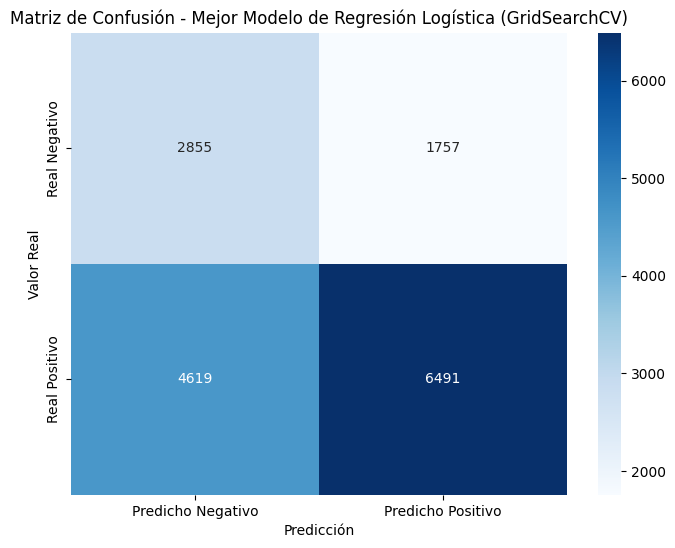


ROC AUC Score del mejor modelo: 0.649


In [ ]:
# prompt: crea un gridsearch cv para modelo de regresion logistic de clasificacion

import matplotlib.pyplot as plt
# Definir la cuadrícula de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Algoritmo de optimización
    'max_iter': [1000, 2000]  # Número máximo de iteraciones
}

# Crear el objeto LogisticRegression
logistic_regression = LogisticRegression(class_weight='balanced')

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV a los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train.values.ravel())

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Mostrar el mejor puntaje (accuracy) obtenido
print("Mejor score (accuracy) en el conjunto de validación:")
print(grid_search.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nMétricas de clasificación del mejor modelo en el conjunto de prueba:")
print(classification_report(y_test, y_pred_best))
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_pred_best))

# Matriz de confusión del mejor modelo
cm_best = confusion_matrix(y_test, y_pred_best)
print("\nMatriz de Confusión del mejor modelo:\n", cm_best)

# Graficar la matriz de confusión del mejor modelo
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicho Negativo', 'Predicho Positivo'], yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Mejor Modelo de Regresión Logística (GridSearchCV)')
plt.show()

# Curva ROC y PR del mejor modelo
y_scores_best = best_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_best = roc_auc_score(y_test, y_scores_best)
print(f"\nROC AUC Score del mejor modelo: {roc_auc_best:.3f}")

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_scores_best)




### Calculo de Sensitivity y Specificity con gridsearchcv

In [ ]:
cm_best = confusion_matrix(y_test, y_pred)
tn_best, fp_best, fn_best, tp_best = cm_best.ravel()

sensitivity_best = tp_best / (tp_best + fn_best)
specificity_best = tn_best / (tn_best + fp_best)

print("\nMétricas del mejor modelo de GridSearchCV:")
print(f"Sensitivity: {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")


Métricas del mejor modelo de GridSearchCV:
Sensitivity: 0.5841
Specificity: 0.6190


### Curva ROC y curva PR  usando el modelo de gridsearchCV

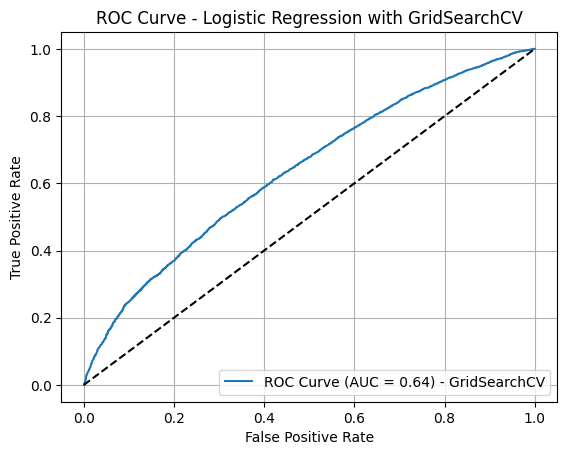

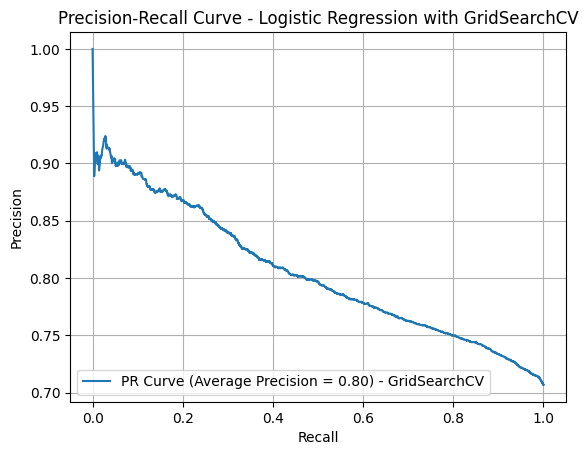

In [ ]:
# prompt: curva rog y curva pr pero  usando el modelo de gridsearchCV

# 9. Curva ROC y Curva PR para el mejor modelo de GridSearch

# Curva ROC para el mejor modelo
fpr_gs, tpr_gs, thresholds_gs_roc = roc_curve(y_test, y_proba)
roc_auc_gs = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr_gs, tpr_gs, label=f"ROC Curve (AUC = {roc_auc_gs:.2f}) - GridSearchCV")
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with GridSearchCV")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Curva PR para el mejor modelo
precision_gs, recall_gs, thresholds_gs_pr = precision_recall_curve(y_test, y_proba)
average_precision_gs = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall_gs, precision_gs, label=f"PR Curve (Average Precision = {average_precision_gs:.2f}) - GridSearchCV")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression with GridSearchCV")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

### Predicciones con el mejor modelo de GridsearchCV


In [ ]:
y_pred_best_model = best_model.predict(X_test_scaled)

# Imprimir las primeras 100 predicciones del mejor modelo
print("Primeras 100 predicciones del mejor modelo de GridsearchCV:")
print(y_pred_best_model[0:100])

Primeras 100 predicciones del mejor modelo de GridsearchCV:
[1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0]


# **Conclusión**

* El modelo en regresion logistic  en la clase 1 tiene un  bajo recall (0.58), perdiendo muchos positivos reales; la clase 0 tiene precisión muy baja (0.38), lo que indica muchas predicciones incorrectas de ceros; el F1-score es desigual  ya que  0.47 clase 0 y  0.67 clase 1 muestra un rendimiento desequilibrado y el accuracy de 59% es engañoso ya que podría ser mayor prediciendo siempre la clase 1; el macro F1 de 0.57 revela bajo rendimiento global que se disimula por el peso de la clase 1. En resumen, el modelo es débil ante el desbalance de clases y falla especialmente en la clase 0.





* El mejor modelo obtenido con GridSearchCV favorece la clase 1 con buena precisión (0.79) pero bajo recall (0.58), lo que indica que pierde muchos positivos reales; la clase 0 mantiene una precisión baja (0.38) pero con mejor recall (0.62), lo que sugiere que predice muchos ceros incorrectamente; el F1-score es desequilibrado igual ya que 0.47 clase 0 y 0.67 clase 1 reflejan un rendimiento desigual, el accuracy de 59.4% es bajo y engañoso debido al desbalance en las clases; el macro F1 de 0.57 confirma bajo rendimiento general. En resumen, el mejor modelo ajustado por GridSearchCV sigue siendo débil frente al desbalance y falla especialmente en la clase 0.